# Assignment 3
### Due 9/23. Do four of five.

1. 
- Open the NHANES (or Ames prices or college completion datasets, if you prefer)
- Find two categorical variables of interest (there are 198, and short descriptions are given in the `nhanes_meta_17_18.csv` file). Investigate their missing values (you don't have to focus on missing values for this analysis like we did with police use of force, but always be aware of how dirty the data are)
- Compute a contingency table for your categorical $X$ and $Y$
- Discuss any interesting patterns (or lack of one) that you observe

In [1]:
import pandas as pd
import numpy as np
data = pd.read_csv("nhanes_data_17_18.csv")

/var/folders/js/d_qzf0bs4v1gw_dwxd4bhx7h0000gp/T/ipykernel_27136/3513520432.py:3: DtypeWarning: Columns (142) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("nhanes_data_17_18.csv")


In [2]:
print(data[['MaritalStatus', 'DifficultyTheseProblemsHaveCaused']])

      MaritalStatus DifficultyTheseProblemsHaveCaused
0               NaN                               NaN
1               NaN                               NaN
2          Divorced                               NaN
3               NaN                               NaN
4               NaN                               NaN
...             ...                               ...
8361        Married                               NaN
8362      Separated                Somewhat difficult
8363  Never married                               NaN
8364            NaN                               NaN
8365       Divorced                Somewhat difficult

[8366 rows x 2 columns]


The 2 categorical variables from the NHANES dataset of interest are: **MaritalStatus** and **DifficultyTheseProblemsHaveCaused** (specifically being related to symptoms of depression). 

In [3]:
print("NA's for MaritalStatus and DifficultyTheseProblemsHaveCaused:", 
      data['MaritalStatus'].isna().value_counts(), data['DifficultyTheseProblemsHaveCaused'].isna().value_counts(), sep = '\n')

NA's for MaritalStatus and DifficultyTheseProblemsHaveCaused:
MaritalStatus
False    5260
True     3106
Name: count, dtype: int64
DifficultyTheseProblemsHaveCaused
True     5007
False    3359
Name: count, dtype: int64


In [4]:
# Contingency table (normalize = 'index' to see percentages)
pd.crosstab(data['MaritalStatus'], data['DifficultyTheseProblemsHaveCaused'], normalize='index')

DifficultyTheseProblemsHaveCaused,Extremely difficult,Not at all difficult,Somewhat difficult,Very difficult
MaritalStatus,,,,
Divorced,0.022727,0.651515,0.262626,0.063131
Living with partner,0.003195,0.734824,0.226837,0.035144
Married,0.008345,0.773296,0.192629,0.025730
Never married,0.009662,0.735910,0.209340,0.045089
Separated,0.015504,0.689922,0.248062,0.046512
Widowed,0.007042,0.718310,0.218310,0.056338


There don't appear to be any overt patterns between *MaritalStatus* and *DifficultyTheseProblemsHaveCaused*, however there are some potential patters. A majority of the observations from *DifficultyTheseProblemsHaveCaused* are in the "Not at all difficult" and "Somewhat difficult" range, typically representing ~$90%$ of the observations based on each *MaritalStatus* group. It doesn't appear to be present that there's a strong disparity for any comparison, however it is very interesting to not that the the *DifficultyTheseProblemsHaveCaused* is the highest percentage in the "Somewhat difficult" and the lowest in the "Not at all difficult" columns for people that have been divorced or separated - potentially highlighting that relationships may strongly influence and contribute to mental health symptoms and difficulties. 

2. 
- Open the NHANES dataset
- Find a categorical and numeric variable of interest (there are 198, and short descriptions are given in the `nhanes_meta_17_18.csv` file). Investigate their missing values (you don't have to focus on missing values for this analysis, but always be aware of them)
- Make descriptive tables and grouped kernel density plots to represent the variation in your numeric $Y$ conditional on your categorical $X$
- Discuss any interesting patterns (or lack of one) that you observe

Let's look at **RacehispanicOriginWNhAsian** and **CigarettesSmokedPerDay** from the *NHANES* dataset.

In [5]:
print("NA's for RacehispanicOriginWNhAsian and CigarettesSmokedPerDay:", 
      data['RacehispanicOriginWNhAsian'].isna().value_counts(), data['CigarettesSmokedPerDay'].isna().value_counts(), sep = '\n')

NA's for RacehispanicOriginWNhAsian and CigarettesSmokedPerDay:
RacehispanicOriginWNhAsian
False    8366
Name: count, dtype: int64
CigarettesSmokedPerDay
True     7450
False     916
Name: count, dtype: int64


### Descriptive tables and KDE plots

In [6]:
### Descriptive tables
numeric_var = "CigarettesSmokedPerDay"
cat_var = "RacehispanicOriginWNhAsian"
pd.set_option('display.max_columns', None) # Display all columns
pd.crosstab(data[cat_var], data[numeric_var], normalize='index')

CigarettesSmokedPerDay,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0,14.0,15.0,16.0,17.0,18.0,19.0,20.0,25.0,30.0,34.0,35.0,40.0,95.0
RacehispanicOriginWNhAsian,,,,,,,,,,,,,,,,,,,,,,,,,,
Mexican American,0.152941,0.141176,0.141176,0.176471,0.117647,0.070588,0.035294,0.035294,0.000000,0.058824,0.000000,0.011765,0.000000,0.000000,0.023529,0.000000,0.000000,0.000000,0.000000,0.023529,0.000000,0.000000,0.000000,0.000000,0.011765,0.000000
Non-Hispanic Asian,0.269231,0.076923,0.076923,0.057692,0.096154,0.057692,0.000000,0.038462,0.000000,0.115385,0.000000,0.076923,0.000000,0.000000,0.038462,0.000000,0.000000,0.000000,0.000000,0.076923,0.000000,0.019231,0.000000,0.000000,0.000000,0.000000
Non-Hispanic Black,0.061069,0.080153,0.125954,0.076336,0.122137,0.080153,0.061069,0.038168,0.011450,0.190840,0.003817,0.019084,0.003817,0.003817,0.022901,0.000000,0.003817,0.000000,0.003817,0.076336,0.003817,0.007634,0.000000,0.000000,0.000000,0.003817
Non-Hispanic White,0.046272,0.041131,0.038560,0.053985,0.051414,0.035990,0.035990,0.025707,0.000000,0.167095,0.000000,0.043702,0.007712,0.010283,0.071979,0.007712,0.015424,0.007712,0.000000,0.264781,0.017995,0.038560,0.002571,0.005141,0.010283,0.000000
Other Hispanic,0.102041,0.102041,0.163265,0.040816,0.122449,0.000000,0.040816,0.081633,0.020408,0.102041,0.000000,0.040816,0.000000,0.000000,0.061224,0.000000,0.000000,0.000000,0.000000,0.102041,0.000000,0.020408,0.000000,0.000000,0.000000,0.000000
Other Race - Including Multi-Racial,0.075949,0.101266,0.050633,0.075949,0.063291,0.012658,0.000000,0.025316,0.012658,0.177215,0.000000,0.025316,0.000000,0.000000,0.063291,0.012658,0.000000,0.012658,0.000000,0.189873,0.012658,0.063291,0.000000,0.000000,0.025316,0.000000


In [7]:
data.loc[:,[numeric_var, cat_var]].groupby(cat_var).describe()

CigarettesSmokedPerDay             \
                                                     count       mean   
RacehispanicOriginWNhAsian                                              
Mexican American                                      85.0   5.129412   
Non-Hispanic Asian                                    52.0   6.788462   
Non-Hispanic Black                                   262.0   7.809160   
Non-Hispanic White                                   389.0  13.015424   
Other Hispanic                                        49.0   7.775510   
Other Race - Including Multi-Racial                   79.0  11.924051   

                                                                           
                                          std  min  25%   50%   75%   max  
RacehispanicOriginWNhAsian                                                 
Mexican American                     5.424346  1.0  2.0   4.0   6.0  40.0  
Non-Hispanic Asian                   6.574868  1.0  1.0   5.0  10.0  30.0  
Non-Hispanic Black                   7.735686  1.0  3.0   6.0  10.0  95.0  
Non-Hispanic White                   8.198552  1.0  6.0  12.0  20.0  40.0  
Other Hispanic                       6.637222  1.0  3.0   5.0  10.0  30.0  
Other Race - Including Multi-Racial  9.490579  1.0  4.0  10.0  20.0  40.0

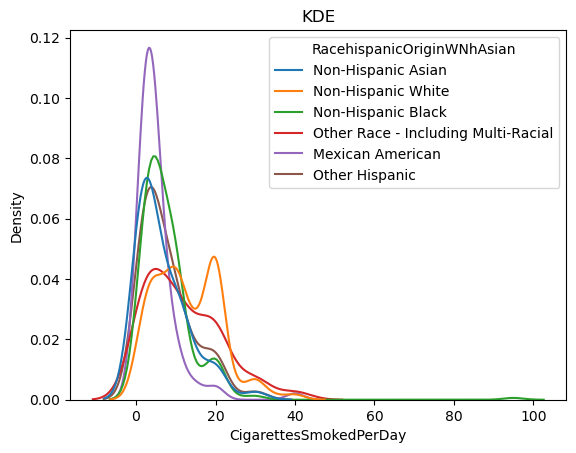

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.kdeplot(data=data, x=numeric_var, hue=cat_var, common_norm=False ).set(title='KDE')
plt.show()

There are a lot of NA's present in the *CigarettesSmokedPerDay* column (almost $90%$!), which is most likely due to NA instances occurring as well as for the observations in which people smoke 0 cigarettes per day. In looking at the table and the KDE plot between *RacehispanicOriginWNhAsian* and *CigarettesSmokedPerDay*, it's interesting to note the smoking habits by race present within the dataset provided. Logically, the KDE plot visualizes a right-skew distribution, with most of the values present for the number of cigarettes per day being in the low range, with some extreme values for the heavy smokers. It's interesting to note the spikes in the KDE plot for the Mexican American and Non-Hispanic White categories, with a peak for all values among Mexican-American's in the 1-5 *CigarettesSmokedPerDay* range, and a peak for Non-Hispanic White people at around 20 *CigarettesSmokedPerDay*. In looking at descriptive statistics by race, we can additionally see the extremeties in smoking habits for Non-Hispanic White people, with the highest mean by a large amount - potentially due to some heavy smokers. 

3. 
We showed that the mean and median could be discovered by minimizing various kinds of loss functions; this is what machine learning is. To make a prediction $\hat{y}(z)$ of $Y$ when $X=z$, minimize the mean squared error:
$$
MSE(\hat{y}(z)) = \dfrac{1}{N} \sum_{i=1}^N \left\lbrace y_i - \hat{y}(z) \right\rbrace^2 \frac{1}{h}k\left(\frac{z-x_i}{h}\right)
$$
Show that the solution to this problem is the LCLS/Naradaya-Watson estimator.

4. 
- Write a class or set of functions that implement the LCLS/Naradaya-Watson estimator, using the Silverman plug-in estimate for the conditioning variable $X$ as the bandwidth.
- From one of the course data sets, find two numeric variables of interest, analyze their relationship with the the LCLS/Naradaya-Watson estimator, and discuss your results.

In [9]:
df = data[['TotalPercentFat', 'CurrentSelfreportedWeightPounds']] # Select cols to compare
df = df[df['CurrentSelfreportedWeightPounds'] < 999] # Filter out observations with weight >= 999
df = df.dropna() # Drop NAs

Computed bandwidth is: 1.922275316812577


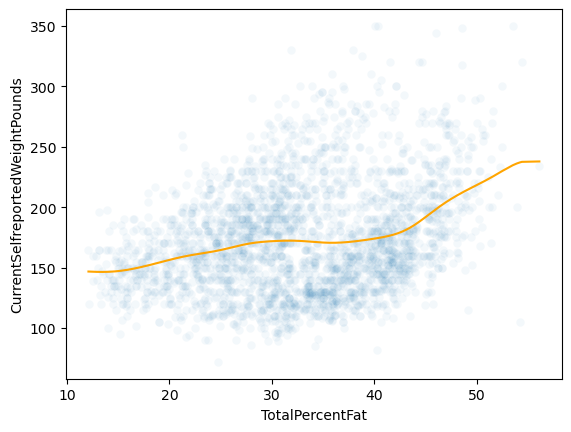

In [10]:
def lcls(df, x_,y_, h = None, plot=True):
    ''' Computes local constant least squares regression estimates with Gaussian kernel. '''
    # Subset data values from df
    x = df[x_]
    y = df[y_]

    n = len(x) # Number of observations
    grid = np.sort(x.unique()) # Extract and sort unique values for x

    # Compute bandwidth, if none provided:
    if h is None:
        h = 1.06 * np.std(x) * len(x)**(-0.2) # Silverman plug-in estimate
        print(f'Computed bandwidth is: {h}')

    # Compute kernel:
    I = -(x.to_numpy().reshape(-1,1)-grid.reshape(1,-1) )**2
    K = np.exp(I/(2*h**2) )/np.sqrt(2*np.pi*h**2 )

    # Compute LCLS estimator:
    numerator = y@K # Compute the numerator
    denominator = np.sum(K,axis=0) # Compute denominator
    y_hat = numerator/denominator # Compute estimator

    # Plot results:
    if plot:
        sns.scatterplot(data=df, y=y_, x=x_,alpha=.05)
        sns.lineplot(x=grid,y=y_hat, color='orange')

    return y_hat, grid

x_, y_ = 'TotalPercentFat', 'CurrentSelfreportedWeightPounds'

y_hat, grid = lcls(df, x_,y_)

For my analysis I looked into **TotalPercentFat** and **CurrentSelfreportedWeightPounds**.

The Silverman plug-in estimate for the bandwith of $2.4$ balances the data to understand the local relationship between *TotalPercentFat* and *CurrentSelfreportedWeightPounds*, while also preventing overfitting. 

The curve and scatterplot between *TotalPercentFat* and *CurrentSelfreportedWeightPounds* indicate that a higher total % fat is linked with a higher self-reported weight, which makes sense, because a higher fat content is indicative a higher weight. The estimated regression curve indicates a positive and somewhat non-linear relationship between *TotalPercentFat* and *CurrentSelfreportedWeightPounds*, as it noticeably plateaus around 30%-40%, despite increasing up to 30% and after 40%.

5. 
- In any of the available data sets, investigate the relationships between pairs of variables $(X,Y)$ with a scatterplot and CEF (for example, price on area)
- Is this relationship plausibly causal, or are there missing variables that might explain at least part of the relationship between your variables? These can be "conceptual" rather than "practical"; for example, 'talent' or 'grit' probably explain education outcomes, but are almost impossible to measure. We are asking whether there are hypothetical **threats to causal identification** of the effect of $X$ on $Y$.
- Explain how, regardless of the threat to causal identification, you can still use your model to predict $Y$ given $X$, as long as you don't intervene in the system to control the outcome

Let's continue to investigate **CigarettesSmokedPerDay** and compare it with **AgeStartedSmokingCigarettesRegularly** from the *nhanes* dataset. A fair assumption would be that the number of cigarettes smoked per day is correlated with the age someone started smoking regularly, assuming that the younger you start, the more likely you are to smoke more cigarettes per day. 

In [11]:
data['AgeStartedSmokingCigarettesRegularly'].describe()

count    2.232000e+03
mean     2.314964e+01
std      7.203744e+01
min      5.397605e-79
25%      1.500000e+01
50%      1.700000e+01
75%      2.000000e+01
max      9.990000e+02
Name: AgeStartedSmokingCigarettesRegularly, dtype: float64

The variable *AgeStartedSmokingCigarettesRegularly* has outliers at 999 for some reason, so those observations will be removed from the dataset, because there are no humans alive at 999 years old. 

[Text(0.5, 1.0, 'Scatterplot of CigarettesSmokedPerDay and AgeStartedSmokingCigarettesRegularly')]

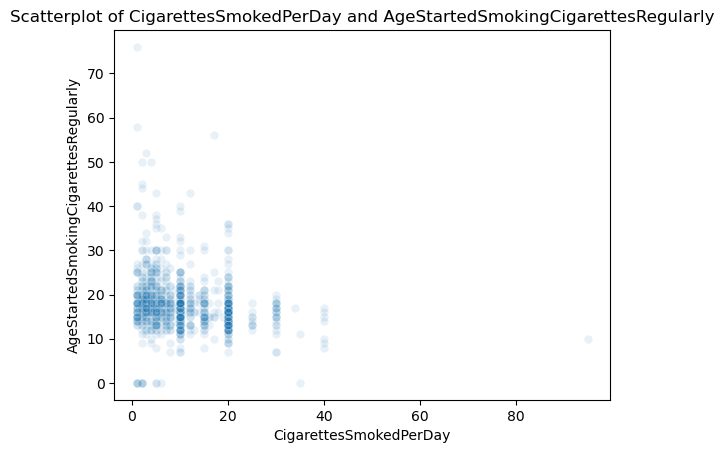

In [12]:
var1 = 'CigarettesSmokedPerDay'
var2 = 'AgeStartedSmokingCigarettesRegularly'
data = data[data['AgeStartedSmokingCigarettesRegularly'] < 999]
sns.scatterplot(data=data, x=var1, y=var2, alpha = .1).set(title='Scatterplot of ' + var1 + ' and ' + var2)

<Axes: xlabel='CigarettesSmokedPerDay', ylabel='AgeStartedSmokingCigarettesRegularly'>

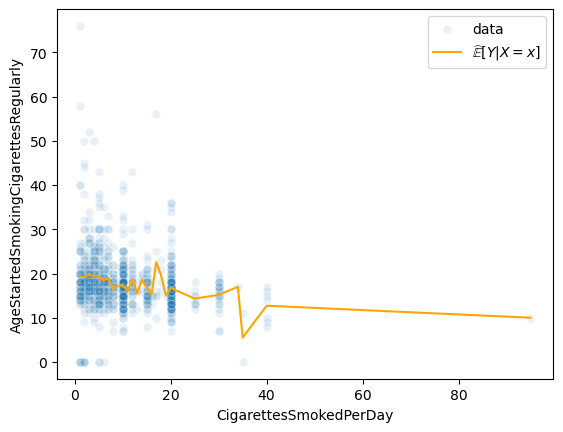

In [13]:
means = data.loc[:,[var2,var1]].groupby(var1).mean()
sns.scatterplot(data=data, y=var2, x=var1,alpha=.1, label='data')
sns.lineplot(data=means, x=var1,y=var2,color='orange', label='$\\widehat{\\mathbb{E}}[Y|X=x]$')

In [14]:
print(means)

                        AgeStartedSmokingCigarettesRegularly
CigarettesSmokedPerDay                                      
1.0                                                19.233333
2.0                                                19.216667
3.0                                                19.779412
4.0                                                19.369231
5.0                                                19.400000
6.0                                                18.363636
7.0                                                18.971429
8.0                                                16.548387
9.0                                                17.200000
10.0                                               17.447552
11.0                                               16.000000
12.0                                               18.709677
13.0                                               15.500000
14.0                                               18.600000
15.0                    

In looking at a scatterplot with and without the CEF ($\widehat{\mathbb{E}}[Y|X=x]$), there does appear to be some type of small correlation between *AgeStartedSmokingCigarettesRegularly* and *CigarettesSmokedPerDay*. Specifically that the earlier someone begins smoking regularly, the higher the number of cigarettes smoked per day is. This is additionally noticeable when  looking at the mean values for *AgeStartedSmokingCigarettesRegularly* based on *CigarettesSmokedPerDay*. It is additionally important to note that the correlation isn't extremely strong, and that the sample for higher smokers per day is extremely small and potentially noisy. There are additionally other factors that can influence the number of cigarettes someone may smoke per day, specifically from the *nhanes* dataset, such as educational performance, family dynamics, class, mental health or other drug use. *AgeStartedSmokingCigarettesRegularly* can still effectively predict *CigarettesSmokedPerDay* in some capacity based upon the scatterplot, means, and CEF provided, as it shows that the earlier one starts smoking cigarettes, the more compelled they may be to smoke more cigarettes on a daily basis, with or without the inclusion of other valuable predictors. 